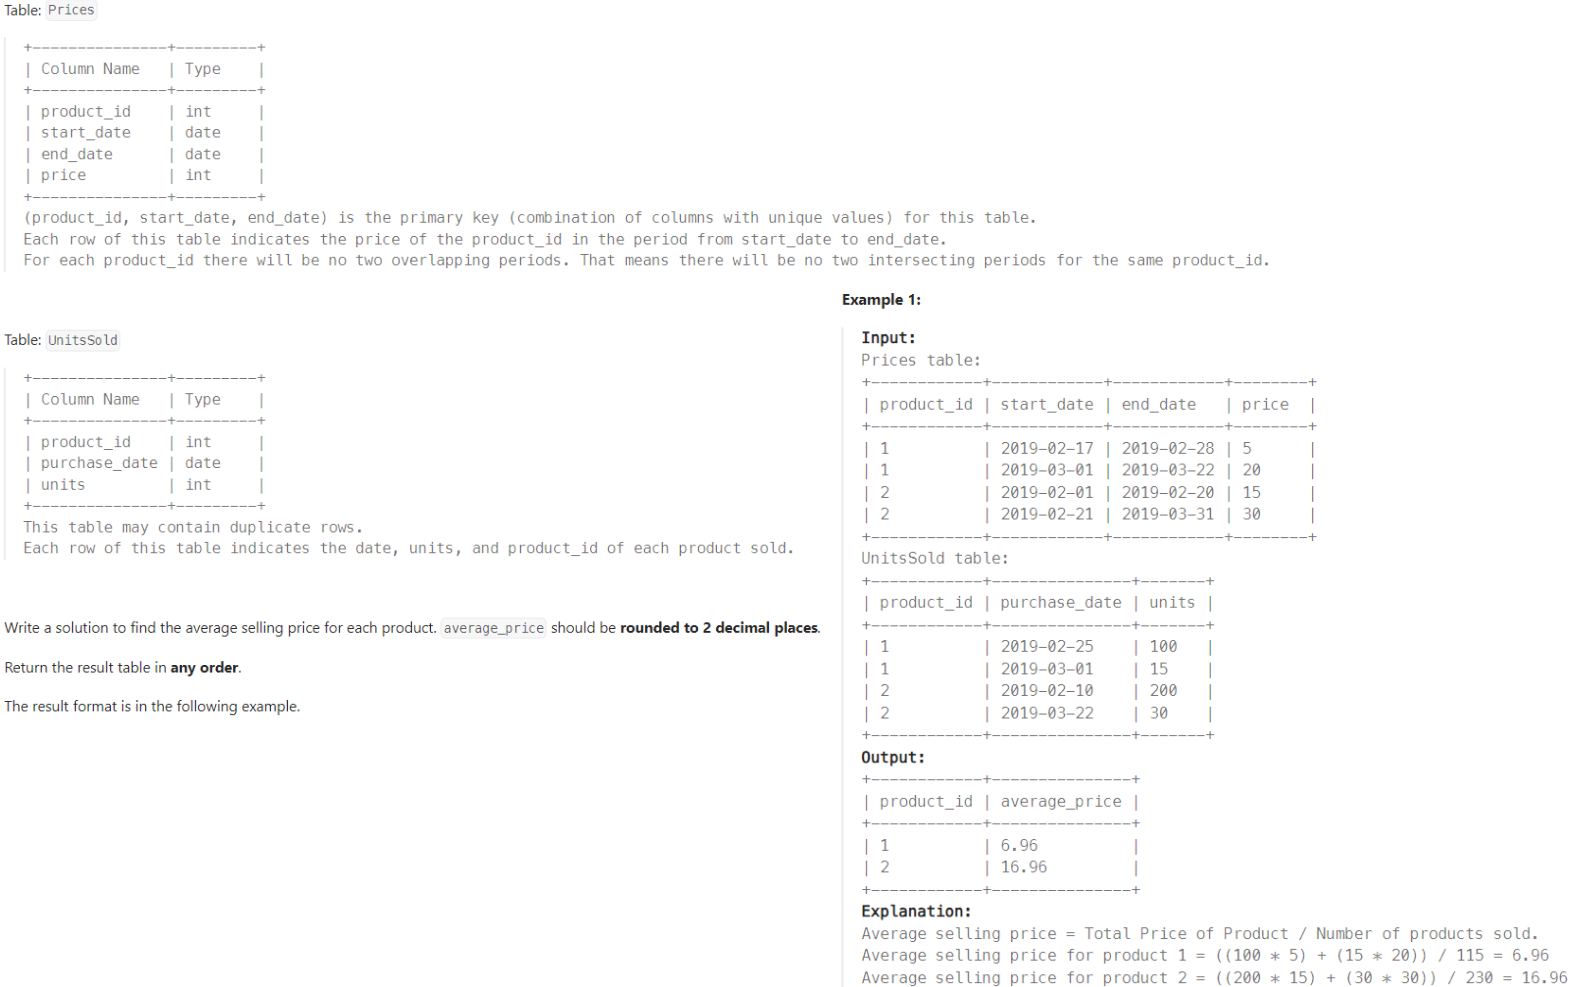

In [ ]:
# This solution passes , but questionable as 0 price

SELECT
    g.product_id,
    CASE
        WHEN ROUND(SUM(g.multipl) / SUM(g.units), 2) IS NOT NULL THEN ROUND(SUM(g.multipl) / SUM(g.units), 2)
        ELSE 0
    END AS average_price 
FROM 
    (SELECT
        p.product_id,
        p.price * u.units AS multipl,
        u.units
    FROM Prices p LEFT JOIN UnitsSold u
    ON u.purchase_date BETWEEN p.start_date AND p.end_date 
        AND p.product_id = u.product_id) g
GROUP BY g.product_id;

In [ ]:
# I think this one is better logically? Notice INNER JOIN 

SELECT
    g.product_id,
    ROUND(SUM(g.multipl) / SUM(g.units), 2) AS average_price 
FROM 
    (SELECT
        p.product_id,
        p.price * u.units AS multipl,
        u.units
    FROM Prices p INNER JOIN UnitsSold u
    ON u.purchase_date BETWEEN p.start_date AND p.end_date 
        AND p.product_id = u.product_id) g
GROUP BY g.product_id;

In [ ]:
# But way better solution without subquery is aggregate on multiplication straight away - SUM(p.price*u.units)

SELECT
    p.product_id,
    CASE 
        WHEN ROUND(SUM(p.price*u.units)/SUM(u.units), 2) IS NOT NULL THEN ROUND(SUM(p.price*u.units)/SUM(u.units), 2)
        ELSE 0
    END AS average_price 
FROM Prices p LEFT JOIN UnitsSold u
ON u.purchase_date BETWEEN p.start_date AND p.end_date 
    AND p.product_id = u.product_id
GROUP BY p.product_id; 